## Machine Learning Model Building Pipeline: Data Analysis

In the following videos, we will take you through a practical example of each one of the steps in the Machine Learning model building pipeline that we described in the previous lectures. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Data Analysis**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. 

### Why is this important? 

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price, and the estimated price by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I download the dataset?

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## House Prices dataset: Data Analysis

In the following cells, we will analyse the variables of the House Price Dataset from Kaggle. I will take you through the different aspects of the analysis that we will make over the variables, and introduce you to the meaning of each of the variables as well. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Let's go ahead and load the dataset.

In [27]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
# load dataset
data = pd.read_csv('houseprice.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The house price dataset contains 1460 rows, i.e., houses, and 81 columns, i.e., variables. 

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: SalePrice

### Missing values

Let's go ahead and find out which variables of the dataset contain missing values

In [5]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

LotFrontage 0.177  % missing values
Alley 0.938  % missing values
MasVnrType 0.005  % missing values
MasVnrArea 0.005  % missing values
BsmtQual 0.025  % missing values
BsmtCond 0.025  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.025  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.473  % missing values
GarageType 0.055  % missing values
GarageYrBlt 0.055  % missing values
GarageFinish 0.055  % missing values
GarageQual 0.055  % missing values
GarageCond 0.055  % missing values
PoolQC 0.995  % missing values
Fence 0.808  % missing values
MiscFeature 0.963  % missing values


Our dataset contains a few variables with missing values. We need to account for this in our following notebook / video, where we will engineer the variables for use in Machine Learning Models.

#### Relationship between values being missing and Sale Price

Let's evaluate the price of the house for those cases where the information is missing, for each variable.

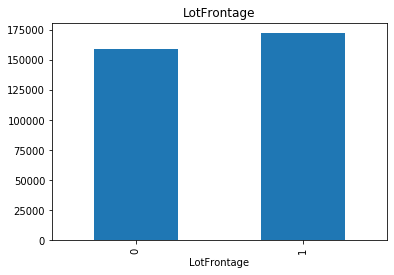

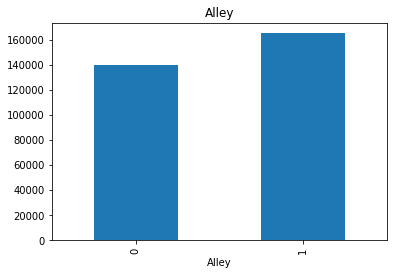

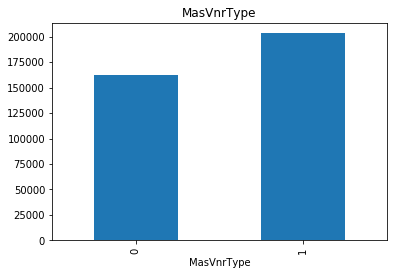

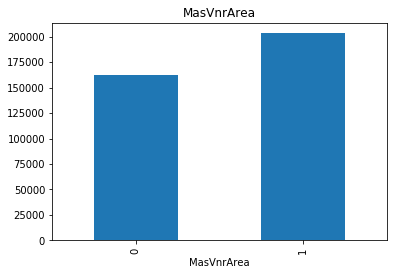

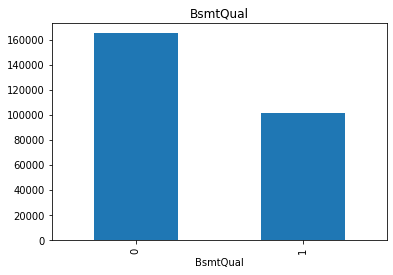

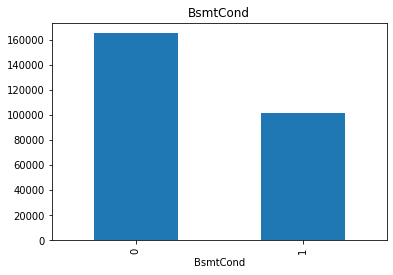

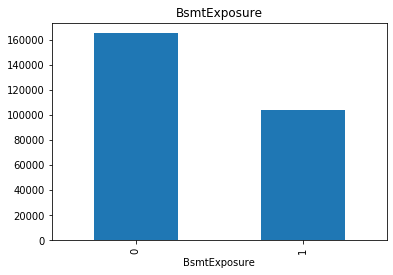

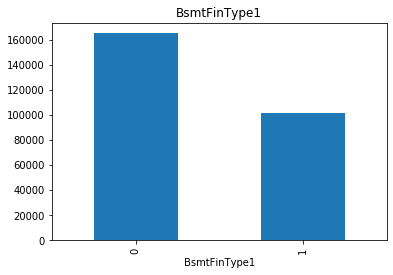

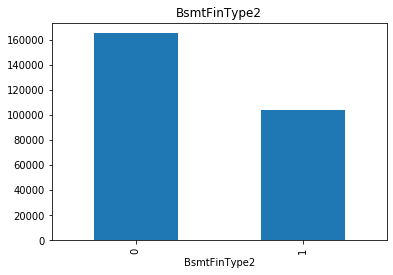

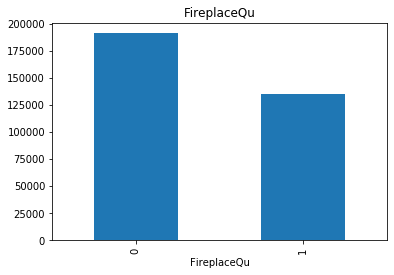

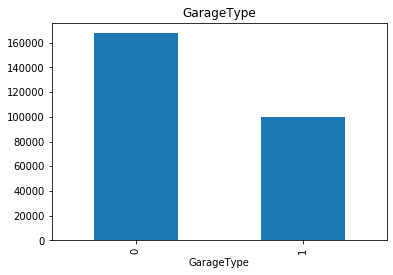

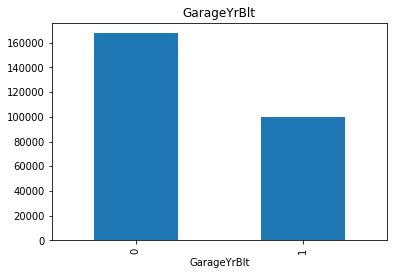

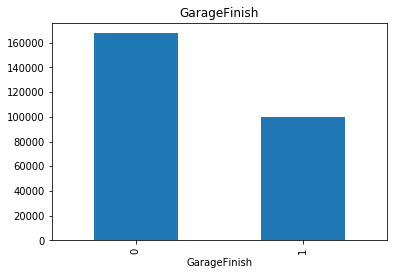

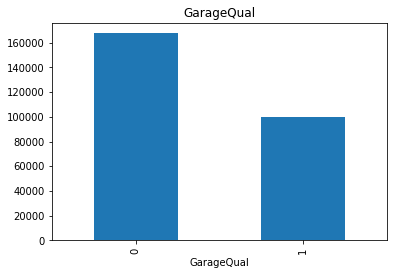

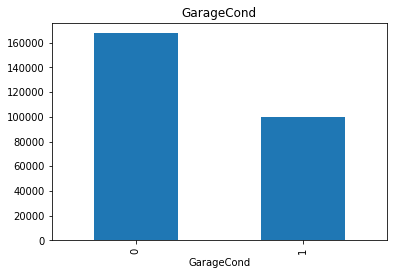

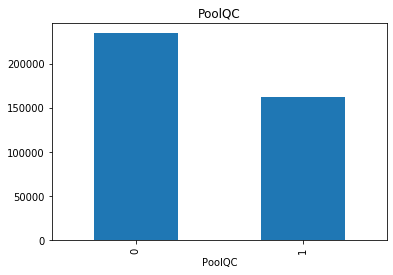

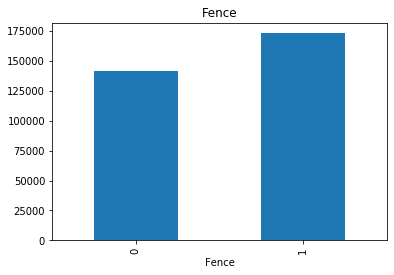

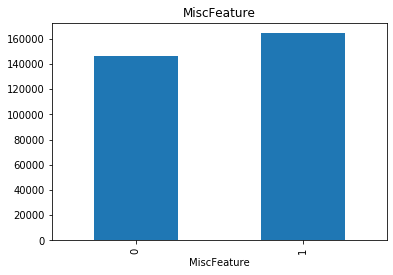

In [6]:
def analyse_na_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(data, var)

We see that the fact that the information is missing for those variables, is important. We will capture this information when we engineer the variables in our next lecture / video.

### Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [7]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


From the above view of the dataset, we notice the variable Id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset. See below:

In [8]:
print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


#### Temporal variables

From the above view we also notice that we have 4 year variables. Typically, we will not use date variables as is, rather we extract information from them. For example, the difference in years between the year the house was built and the year the house was sold. We need to take this into consideration in our next video / notebook, where we will engineer our features.

In [9]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
# let's explore the content of these year variables
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

As you can see, it refers to years.

We can also explore the evolution of the sale price with the years in which the house was sold:

Text(0.5, 1.0, 'Change in House price with the years')

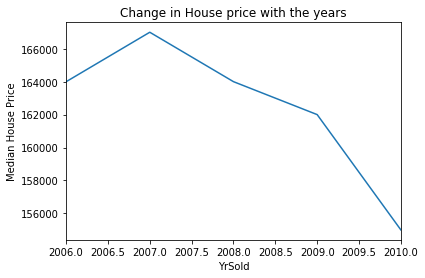

In [11]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price with the years')

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.


Let's go ahead and explore whether there is a relationship between the year variables and SalePrice. For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

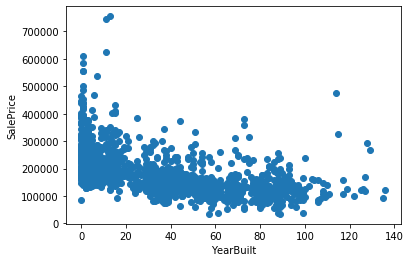

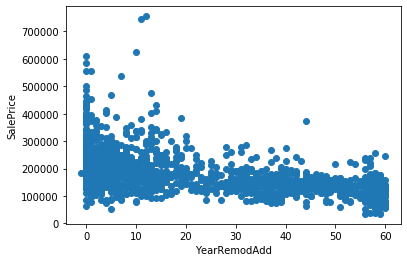

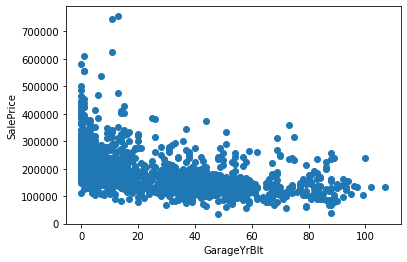

In [12]:
# let's explore the relationship between the year variables and the house price in a bit of more details
def analyse_year_vars(df, var):
    df = df.copy()
    
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)
    

We see that there is a tendency to a decrease in price, with older features.

#### Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [13]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20 and var not in year_vars+['Id']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  14


In [14]:
# let's visualise the discrete variables
data[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


We can see that these variables tend to be Qualifications or grading scales, or refer to the number of rooms, or units. Let's go ahead and analyse their contribution to the house price.

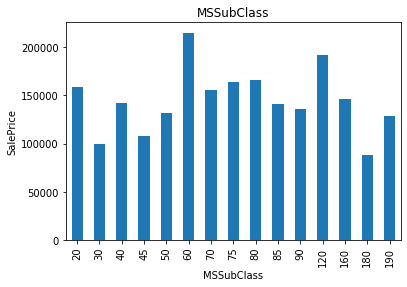

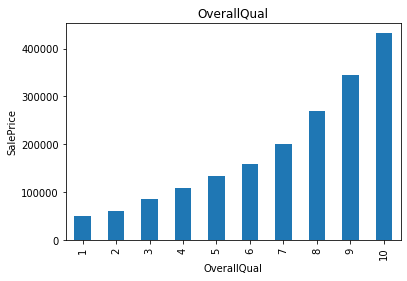

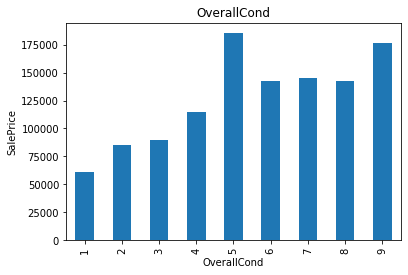

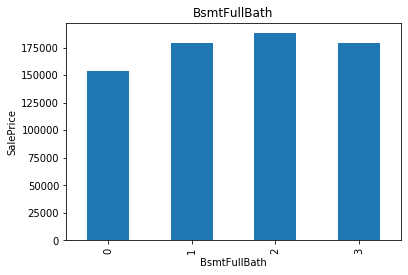

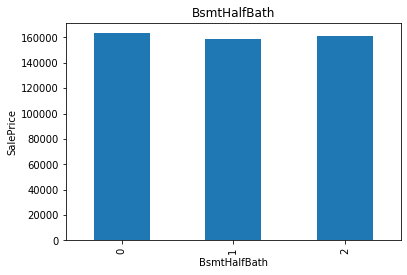

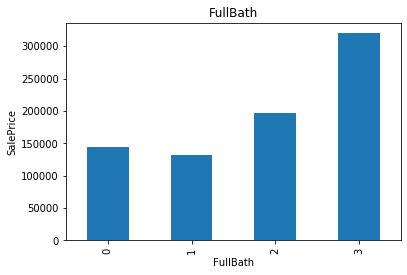

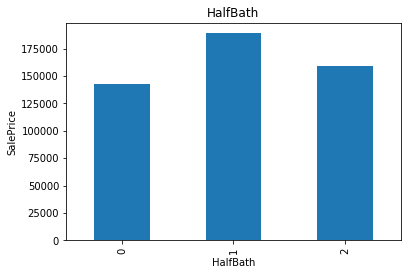

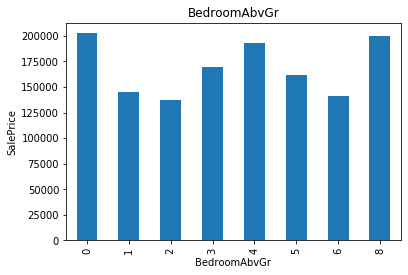

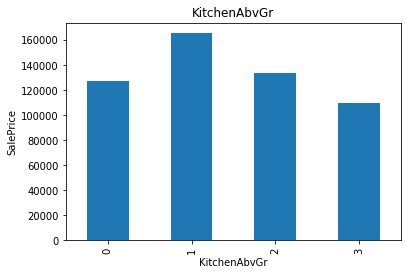

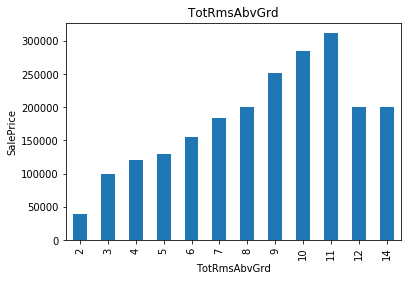

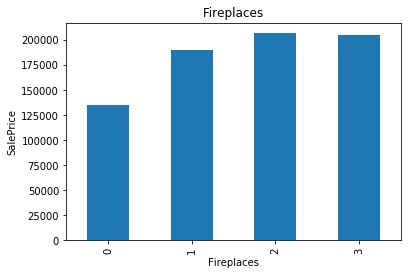

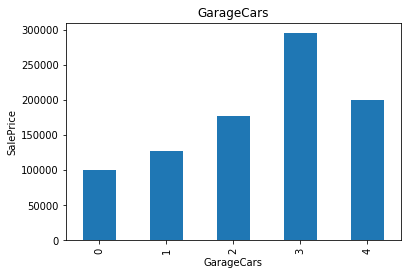

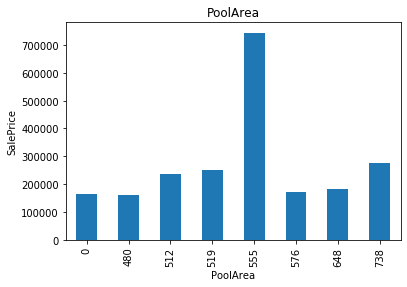

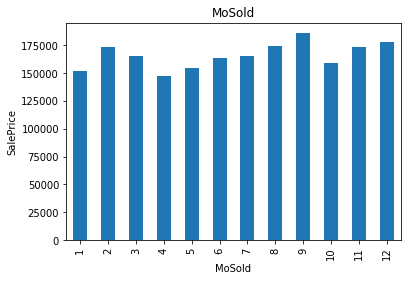

In [15]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

We see that there is a relationship between the variable numbers and the SalePrice, but this relationship is not always monotonic. 

For example, for OverallQual, there is a monotonic relationship: the higher the quality, the higher the SalePrice.  

However, for OverallCond, the relationship is not monotonic. Clearly, some Condition grades, like 5, favour better selling prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract the most for a linear model. 

There are ways to re-arrange the order of the discrete values of a variable, to create a monotonic relationship between the variable and the target. However, for the purpose of this course, we will not do that, to keep feature engineering simple. If you want to learn more about how to engineer features, visit our course [Feature Engineering for Machine Learning](https://www.udemy.com/feature-engineering-for-machine-learning/?couponCode=UDEMY2018) in Udemy.com

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous all those that are not temporal or discrete variables in our dataset.

In [16]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  19


In [17]:
# let's visualise the continuous variables
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


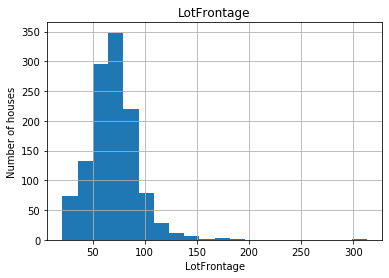

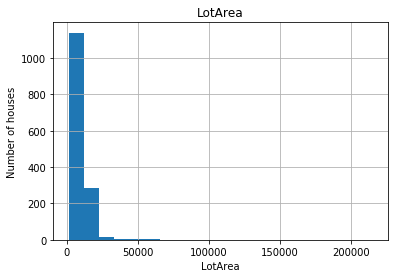

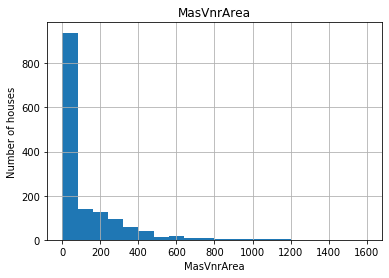

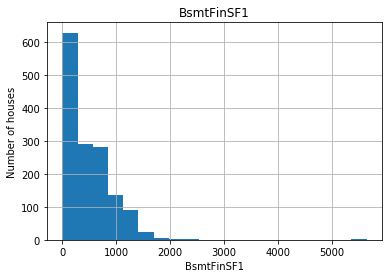

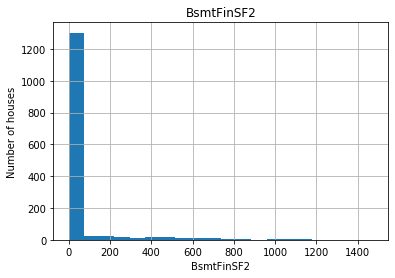

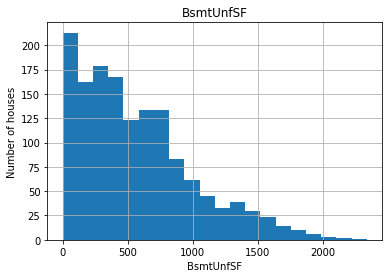

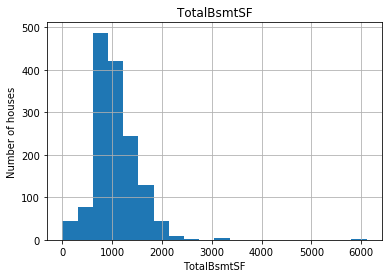

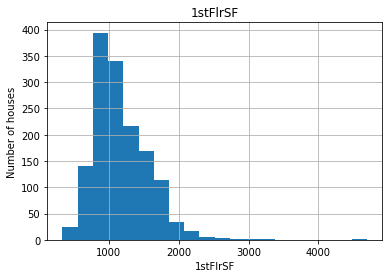

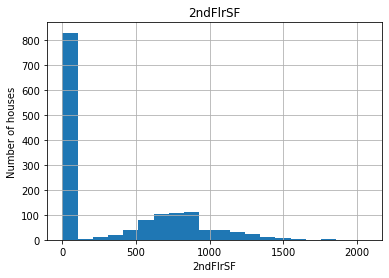

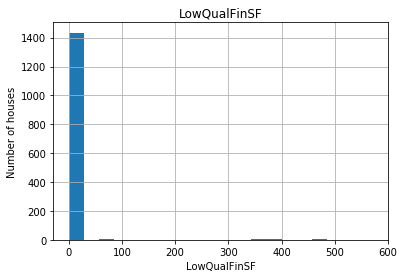

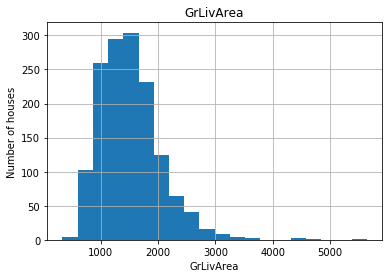

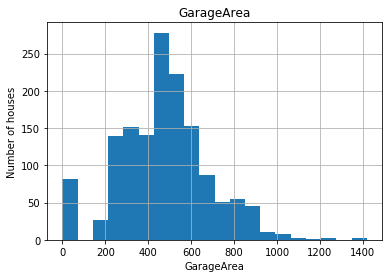

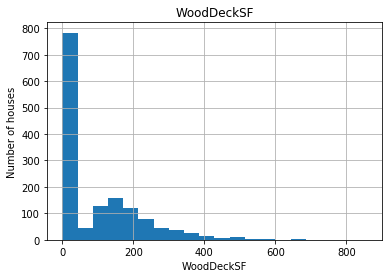

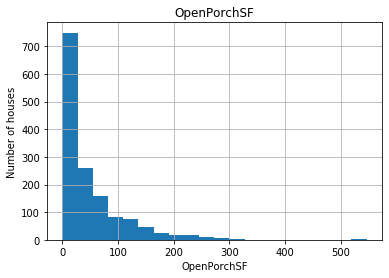

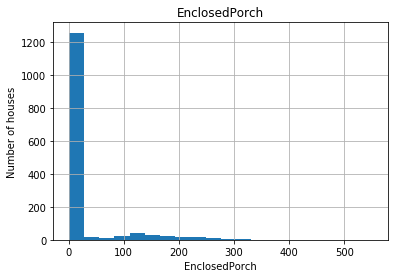

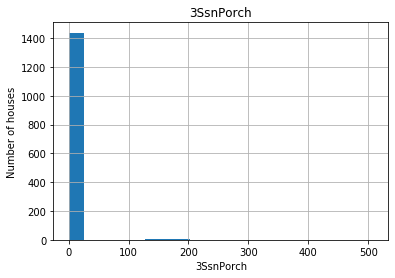

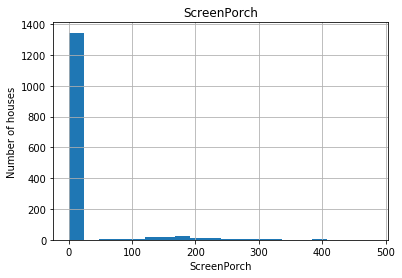

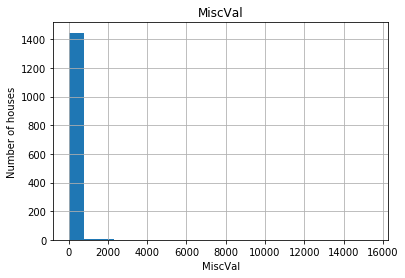

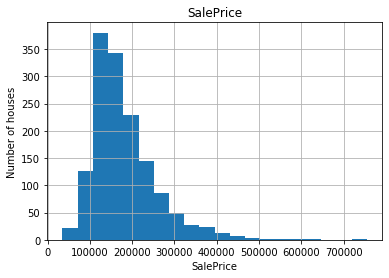

In [18]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data, var)

We see that all of the above variables, are not normally distributed, including the target variable 'SalePrice'. For linear models to perform best, we need to account for non-Gaussian distributions. We will transform our variables in the next lecture / video, during our feature engineering section.

Let's also evaluate here if a log transformation renders the variables more Gaussian looking:

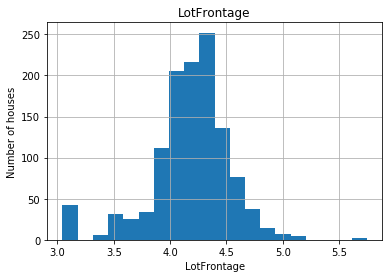

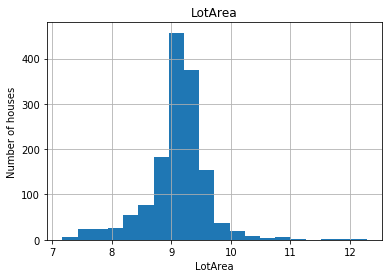

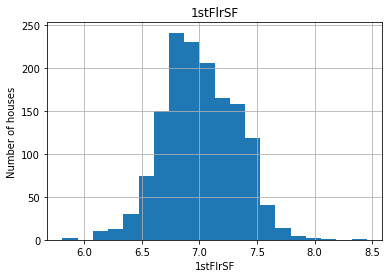

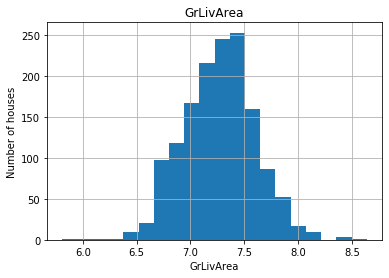

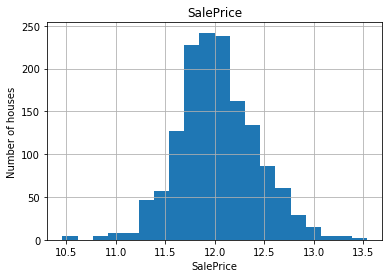

In [19]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(data, var)

We get a better spread of values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

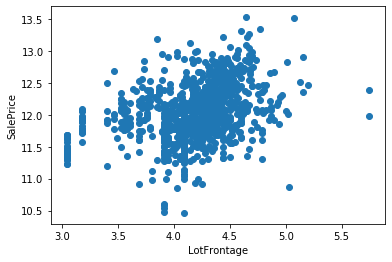

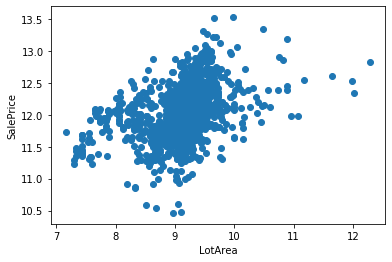

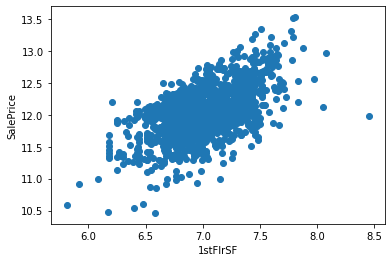

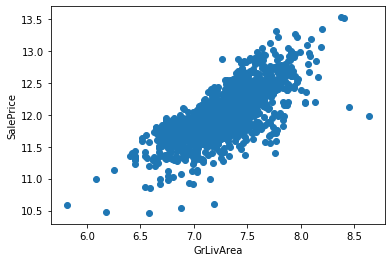

In [20]:
# let's explore the relationship between the house price and the transformed variables
# with more detail
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[var], df['SalePrice'])
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.show()
    
for var in cont_vars:
    if var !='SalePrice':
        transform_analyse_continous(data, var)

From the previous plots, we observe some monotonic associations between SalePrice and the variables to which we applied the log transformation, for example 'GrLivArea'.

#### Outliers

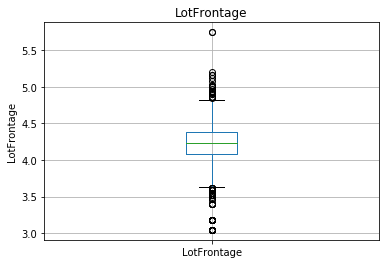

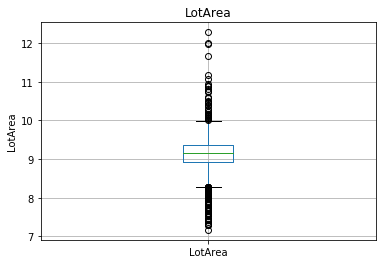

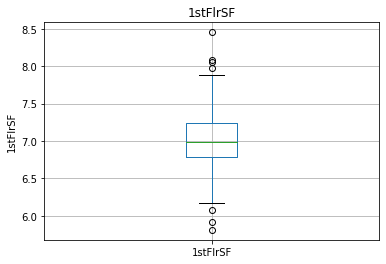

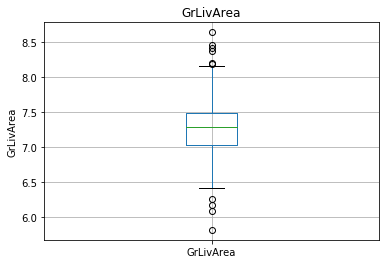

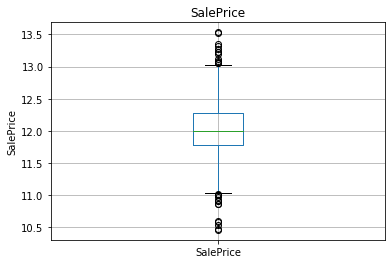

In [21]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in cont_vars:
    find_outliers(data, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our  final machine learning model.

The purpose of this course is however to teach you how to put your models in production. Therefore, we will not spend more time looking at how best to remove outliers, and we will rather deploy a simpler model.

However, if you want to learn more about the value of removing outliers, visit our course [Feature Engineering for Machine Learning](https://www.udemy.com/feature-engineering-for-machine-learning/?couponCode=UDEMY2018).

The same is true for variable transformation. There are multiple ways to improve the spread of the variable over a wider range of values. You can learn more about it in our course [Feature Engineering for Machine Learning](https://www.udemy.com/feature-engineering-for-machine-learning/?couponCode=UDEMY2018).

### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [22]:
### Categorical variables

cat_vars = [var for var in data.columns if data[var].dtypes=='O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  43


In [23]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [24]:
for var in cat_vars:
    print(var, len(data[var].unique()), ' categories')

MSZoning 5  categories
Street 2  categories
Alley 3  categories
LotShape 4  categories
LandContour 4  categories
Utilities 2  categories
LotConfig 5  categories
LandSlope 3  categories
Neighborhood 25  categories
Condition1 9  categories
Condition2 8  categories
BldgType 5  categories
HouseStyle 8  categories
RoofStyle 6  categories
RoofMatl 8  categories
Exterior1st 15  categories
Exterior2nd 16  categories
MasVnrType 5  categories
ExterQual 4  categories
ExterCond 5  categories
Foundation 6  categories
BsmtQual 5  categories
BsmtCond 5  categories
BsmtExposure 5  categories
BsmtFinType1 7  categories
BsmtFinType2 7  categories
Heating 6  categories
HeatingQC 5  categories
CentralAir 2  categories
Electrical 6  categories
KitchenQual 4  categories
Functional 7  categories
FireplaceQu 6  categories
GarageType 7  categories
GarageFinish 4  categories
GarageQual 6  categories
GarageCond 6  categories
PavedDrive 3  categories
PoolQC 4  categories
Fence 5  categories
MiscFeature 5  categor

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

#### Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [25]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()


MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. We will engineer these variables in our next video. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house price:

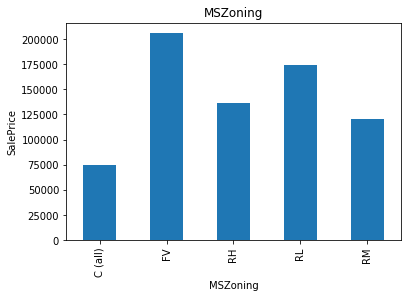

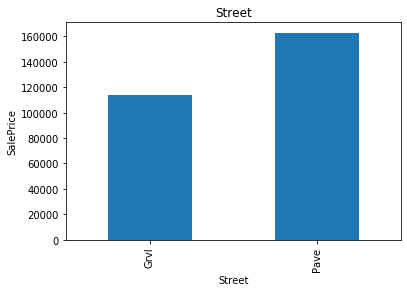

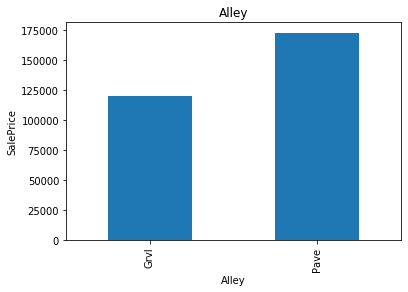

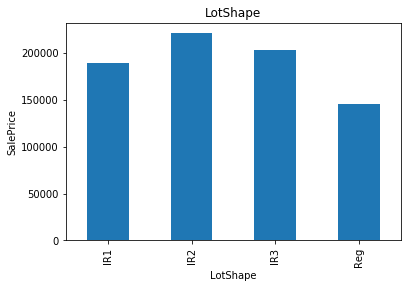

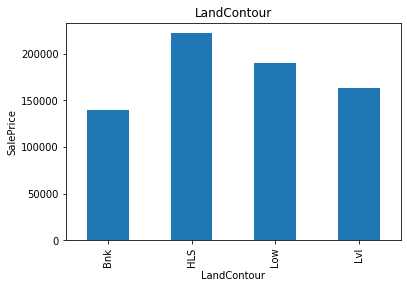

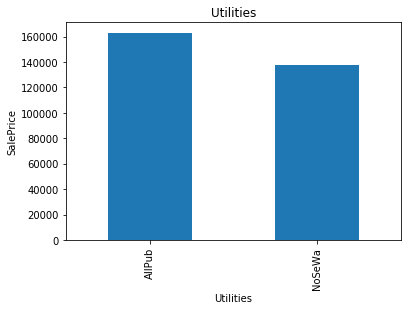

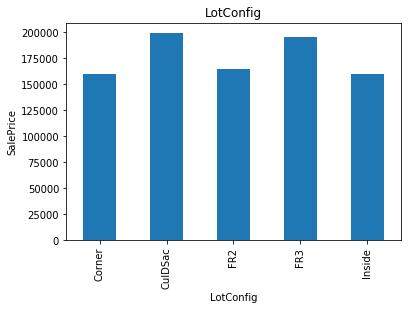

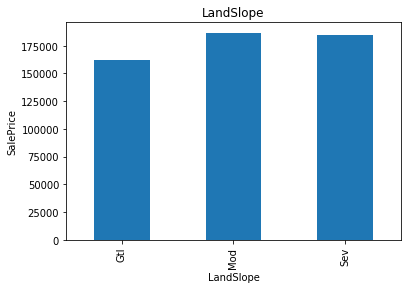

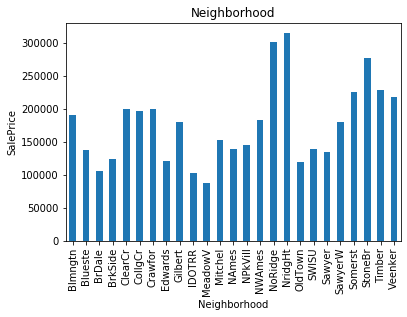

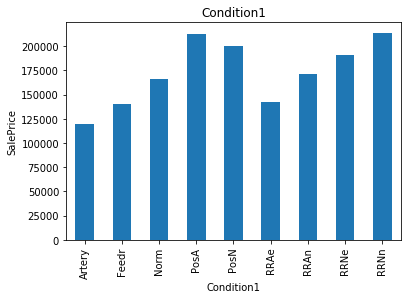

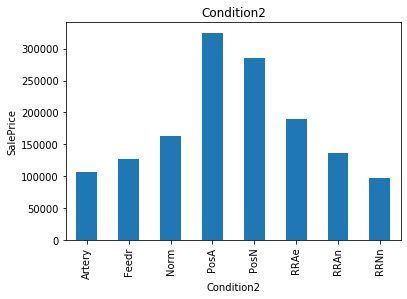

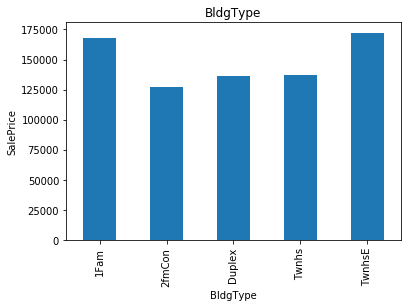

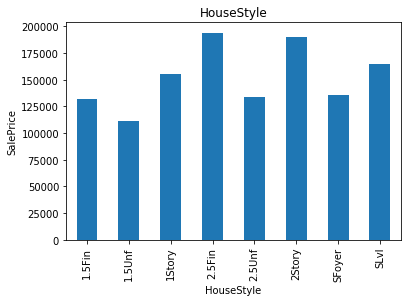

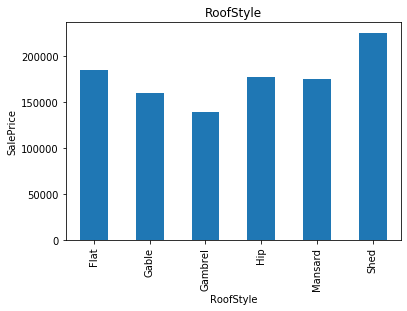

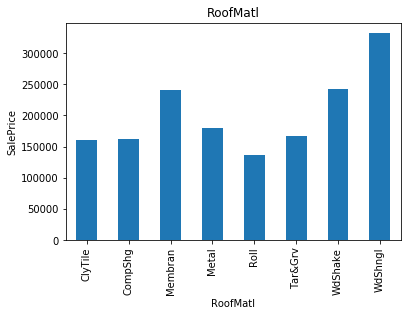

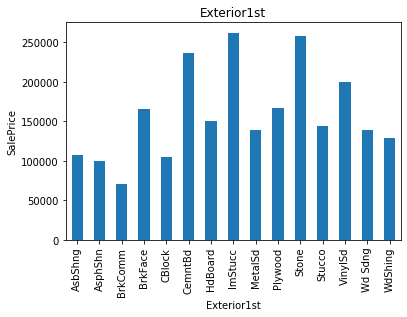

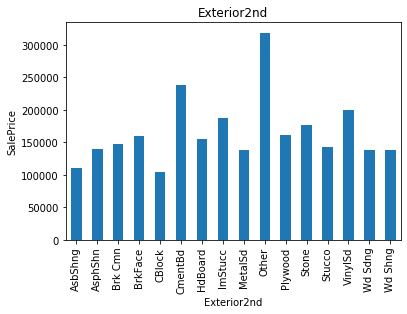

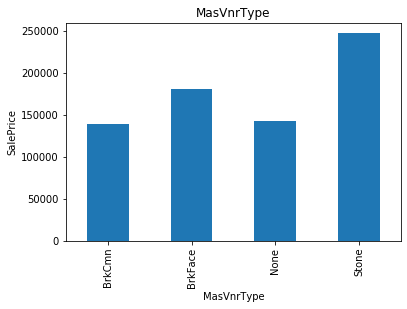

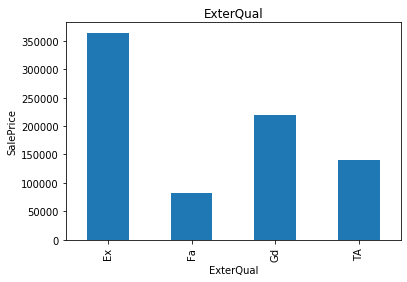

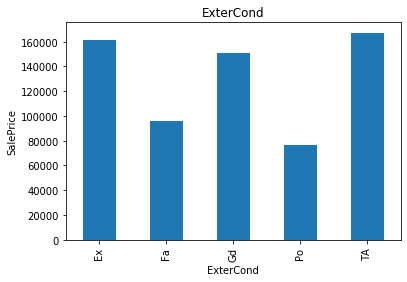

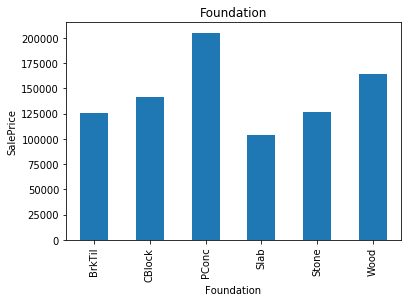

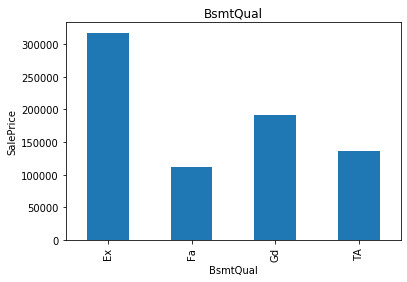

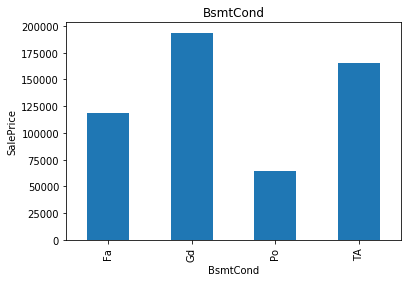

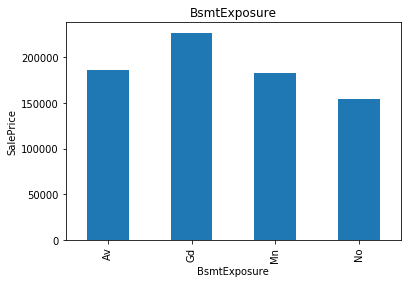

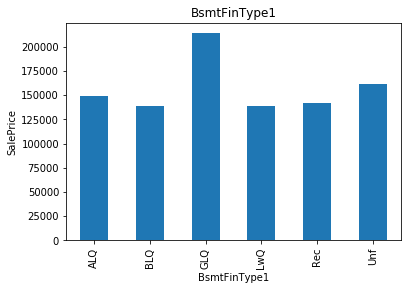

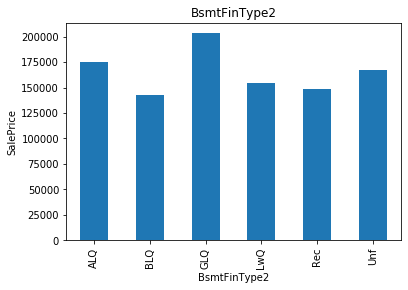

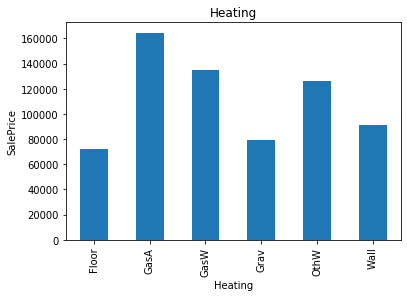

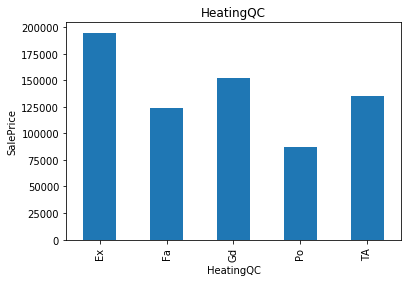

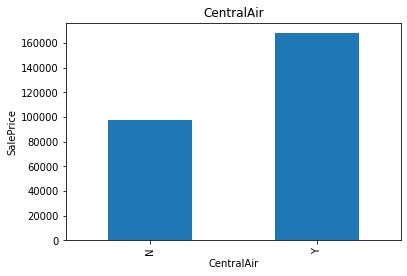

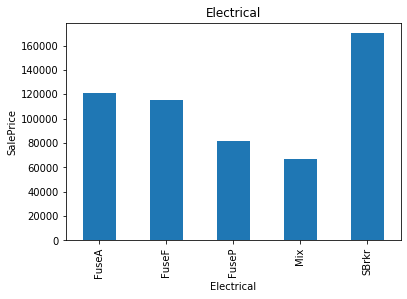

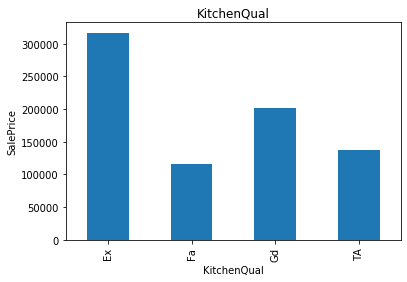

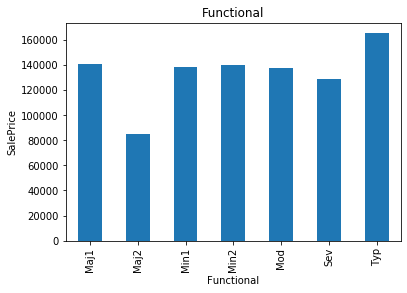

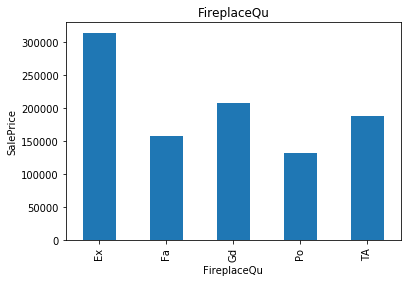

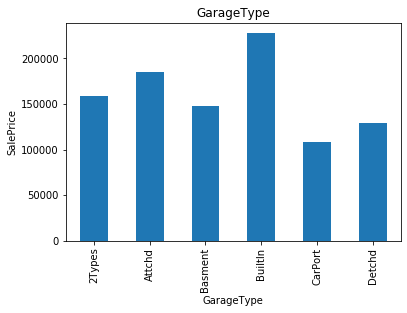

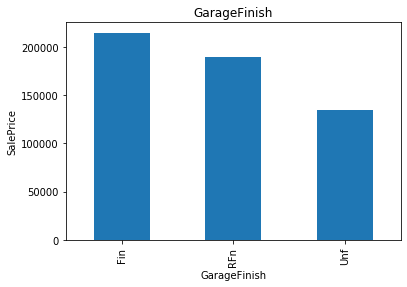

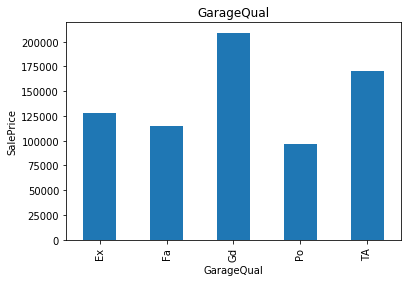

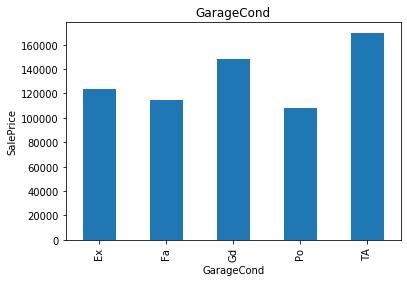

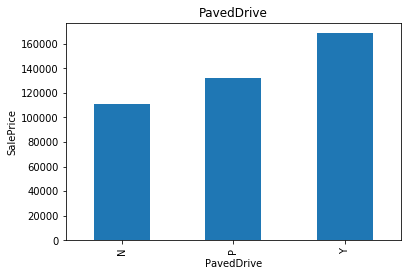

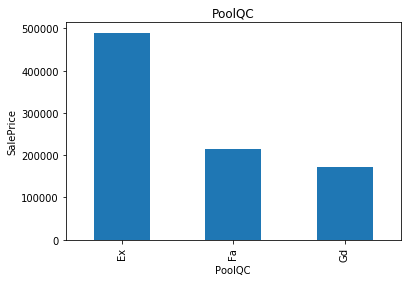

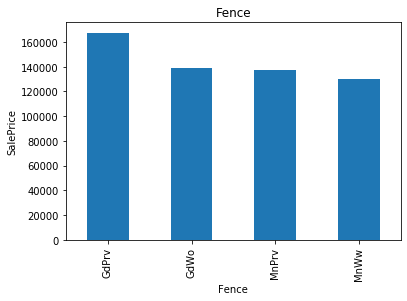

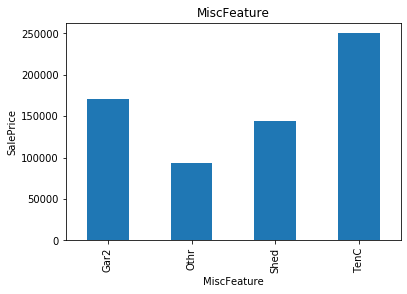

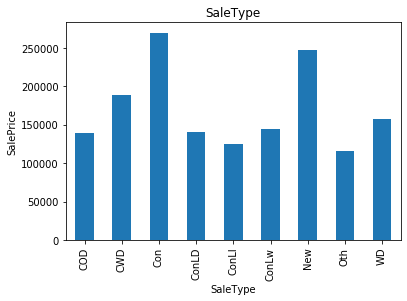

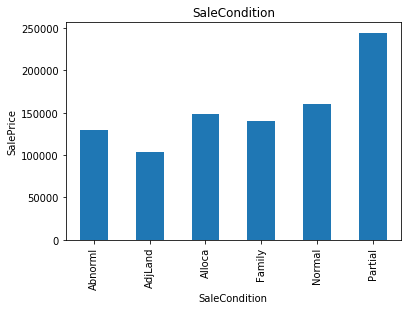

In [26]:
for var in cat_vars:
    analyse_discrete(data, var)

Clearly, the categories give information on the SalePrice. In the next video, we will transform these strings / labels into numbers, so that we capture this information and transform it into a monotonic relationship between the category and the house price.

**Disclaimer:**

This is by no means an exhaustive data exploration. There is certainly more to be done to understand the nature of this data and the relationship of these variables with the target, SalePrice.

However, we hope that through this notebook we gave you both a flavour of what data analysis should look like, and set the bases for the coming steps in the machine learning model building pipeline.

That is all for this lecture / notebook. I hope you enjoyed it, and see you in the next one!